Dataset Shape: (6309, 4)
Null Values: Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
Passive Aggressive Classifier Accuracy: 94.24%
Logistic Regression Accuracy: 92.08%
Vectorizer saved successfully.
Passive Aggressive Classifier model saved successfully.
Logistic Regression model saved successfully.


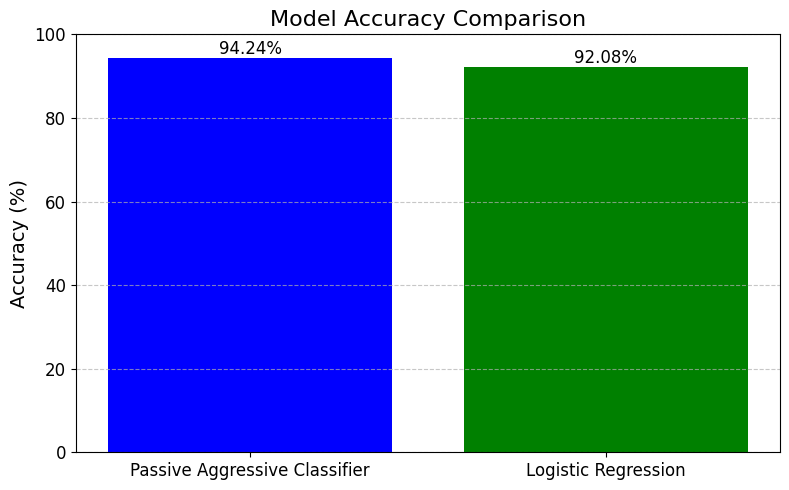

In [1]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
# from sklearn.metrics import accuracy_score
# import pickle
# import os
# import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv("news.csv")

# # Check for null values and basic info
# print("Dataset Shape:", df.shape)
# print("Null Values:", df.isnull().sum())

# # Handle missing values in 'title' and 'text' columns
# df['title'] = df['title'].fillna('')  # Replace NaN values in 'title' with empty strings
# df['text'] = df['text'].fillna('')    # Replace NaN values in 'text' with empty strings

# # Check for missing labels
# if df['label'].isnull().sum() > 0:
#     print("Warning: There are missing values in the 'label' column. Handling missing values...")
#     # Fill NaN labels with a default value (e.g., 'Unknown') or drop rows with NaN labels
#     df = df.dropna(subset=['label'])  # Dropping rows with missing labels

# # Extract features and labels
# labels = df['label']
# x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.3, random_state=20)

# # Initialize a TfidfVectorizer
# vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# # Fit and transform the training data, transform the test data
# tf_train = vectorizer.fit_transform(x_train)
# tf_test = vectorizer.transform(x_test)

# # Train the Passive Aggressive Classifier
# pac = PassiveAggressiveClassifier(max_iter=50)
# pac.fit(tf_train, y_train)
# pac_y_pred = pac.predict(tf_test)
# pac_score = accuracy_score(y_test, pac_y_pred)

# print(f"Passive Aggressive Classifier Accuracy: {round(pac_score * 100, 2)}%")

# # Train the Logistic Regression model
# logistic = LogisticRegression(max_iter=1000)
# logistic.fit(tf_train, y_train)
# logistic_y_pred = logistic.predict(tf_test)
# logistic_score = accuracy_score(y_test, logistic_y_pred)

# print(f"Logistic Regression Accuracy: {round(logistic_score * 100, 2)}%")

# # Save both models and the vectorizer using pickle

# # Specify directory for saving files (change this to a valid path on your machine)
# save_dir = "D:/main project/Fake news detection"  # Change to your local directory

# # Check if the directory exists, and create if it doesn't
# if not os.path.exists(save_dir):
#     try:
#         os.makedirs(save_dir)
#         print(f"Directory created at: {save_dir}")
#     except Exception as e:
#         print(f"Error creating directory: {e}")

# # Saving the vectorizer
# try:
#     with open(os.path.join(save_dir, "vectorizer.pkl"), "wb") as vectorizer_file:
#         pickle.dump(vectorizer, vectorizer_file)
#     print("Vectorizer saved successfully.")
# except Exception as e:
#     print(f"Error saving vectorizer: {e}")

# # Saving the Passive Aggressive Classifier model
# try:
#     with open(os.path.join(save_dir, "pac_model.pkl"), "wb") as pac_file:
#         pickle.dump(pac, pac_file)
#     print("Passive Aggressive Classifier model saved successfully.")
# except Exception as e:
#     print(f"Error saving PAC model: {e}")

# # Saving the Logistic Regression model
# try:
#     with open(os.path.join(save_dir, "logistic_model.pkl"), "wb") as logistic_file:
#         pickle.dump(logistic, logistic_file)
#     print("Logistic Regression model saved successfully.")
# except Exception as e:
#     print(f"Error saving Logistic model: {e}")

# # Additional Code: Display Accuracy Bar Chart
# # Define model names and their accuracies
# models = ['Passive Aggressive Classifier', 'Logistic Regression']
# accuracies = [pac_score * 100, logistic_score * 100]

# # Plotting the accuracy chart
# plt.figure(figsize=(8, 5))
# plt.bar(models, accuracies, color=['blue', 'green'])
# plt.title('Model Accuracy Comparison', fontsize=16)
# plt.ylabel('Accuracy (%)', fontsize=14)
# plt.ylim(0, 100)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Annotate bars with accuracy values
# for i, v in enumerate(accuracies):
#     plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

# # Show the chart
# plt.tight_layout()
# plt.show()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import os
import matplotlib.pyplot as plt
import re

# Load the dataset
df = pd.read_csv("news.csv")

# Check for null values and basic info
print("Dataset Shape:", df.shape)
print("Null Values:", df.isnull().sum())

# Handle missing values in 'title' and 'text' columns
df['title'] = df['title'].fillna('')  # Replace NaN values in 'title' with empty strings
df['text'] = df['text'].fillna('')    # Replace NaN values in 'text' with empty strings

# Check for missing labels
if df['label'].isnull().sum() > 0:
    print("Warning: There are missing values in the 'label' column. Handling missing values...")
    # Fill NaN labels with a default value (e.g., 'Unknown') or drop rows with NaN labels
    df = df.dropna(subset=['label'])  # Dropping rows with missing labels

# Check for duplicates and remove them
if df.duplicated().sum() > 0:
    print("Warning: There are duplicate rows. Removing them...")
    df = df.drop_duplicates()

# Additional Text Preprocessing (lowercase, remove special characters, etc.)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['text'] = df['text'].apply(preprocess_text)

# Extract features and labels
labels = df['label']
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.3, random_state=20)

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data, transform the test data
tf_train = vectorizer.fit_transform(x_train)
tf_test = vectorizer.transform(x_test)

# Train the Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)
pac_y_pred = pac.predict(tf_test)
pac_score = accuracy_score(y_test, pac_y_pred)

print(f"Passive Aggressive Classifier Accuracy: {round(pac_score * 100, 2)}%")

# Train the Logistic Regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(tf_train, y_train)
logistic_y_pred = logistic.predict(tf_test)
logistic_score = accuracy_score(y_test, logistic_y_pred)

print(f"Logistic Regression Accuracy: {round(logistic_score * 100, 2)}%")

# Save both models and the vectorizer using pickle

# Specify directory for saving files (change this to a valid path on your machine)
save_dir = "D:/main project/Fake news detection"  # Change to your local directory

# Check if the directory exists, and create if it doesn't
if not os.path.exists(save_dir):
    try:
        os.makedirs(save_dir)
        print(f"Directory created at: {save_dir}")
    except Exception as e:
        print(f"Error creating directory: {e}")

# Saving the vectorizer
try:
    with open(os.path.join(save_dir, "vectorizer.pkl"), "wb") as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)
    print("Vectorizer saved successfully.")
except Exception as e:
    print(f"Error saving vectorizer: {e}")

# Saving the Passive Aggressive Classifier model
try:
    with open(os.path.join(save_dir, "pac_model.pkl"), "wb") as pac_file:
        pickle.dump(pac, pac_file)
    print("Passive Aggressive Classifier model saved successfully.")
except Exception as e:
    print(f"Error saving PAC model: {e}")

# Saving the Logistic Regression model
try:
    with open(os.path.join(save_dir, "logistic_model.pkl"), "wb") as logistic_file:
        pickle.dump(logistic, logistic_file)
    print("Logistic Regression model saved successfully.")
except Exception as e:
    print(f"Error saving Logistic model: {e}")

# Additional Code: Display Accuracy Bar Chart
# Define model names and their accuracies
models = ['Passive Aggressive Classifier', 'Logistic Regression']
accuracies = [pac_score * 100, logistic_score * 100]

# Plotting the accuracy chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()
